In [32]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [296]:
file = 'D:\\reviews_corpus.csv'

corpus = {
    'review_text': [
        "Love from the first sight! Read it twice, was so good, definitely recommend.",
        "well, i got bored quickly, was not even scary",
        "Well, i loved it, fascinating!",
        "I do not know how i feel about this book. Make sure you are mentally prepared for it, because, well, it's a long, tough ride!",
        "horror is not for me",
        "it was amazing, read it in a month, even though the book is enormous",
        "1200 pages are long. So long that I expected more from it. I believe that this book would have been a lot better if you had cut out 200 pages or more.",
        "This is a huge book, but if you consider to read it, it's definitely worth your time.",
        "It's a no from me.",
        "A true masterpiece!",
        "Why does this book have such a high rating? Boring.",
        "If you want to read a story about a terrifying evil that may haunt your dreams, this is definitely IT! Highly recommend if you're a fan of this genre.",
        "I hate this book and I hate everyone who made me think it was good.",
        "Was so boring, that i did not even finish the 2 chapter. Sorry, but it's a big no for me ;)",
        "Why are all the characters - every! single! one! of! them! - so annoying? Did not like",
        "Holy crap this book was scary. I've always been a fan of horror novels, but very few have ever actually scared me. This book did the trick.",
        "How I wanted to love and get scared by this book, but could not!",
        "Wow, interesting!",
        "this genre not for me for sure, just do not like horror",
        "Out of all his books, this one has scared me most.",
        "The best book that i have ever read",
        "I really just read it in one sitting, was so interesting, but not the best of his books",
        "Wow, definitely one of my favorite books!!!",
        "It was actually not that good as i thought it would be. Mediocre.",
        "The length of this book is incredibly long and I do not feel like it was necessary, at some point I was not even scared I really just wanted to reach the end whatever the result would have been.",
    ],
    'rate': [5, 2, 5, 2, 1, 5, 2, 4, 1, 5, 2, 4, 1, 1, 2, 4, 2, 5, 2, 5, 5, 4, 5, 3, 3],
}

df = pd.DataFrame(corpus)

df.to_csv(file, index=False)

print(f'csv file "{file}" created successfully.')

csv file "D:\reviews_corpus.csv" created successfully.


In [297]:
df.head(5)

,review_text,rate
0,"Love from the first sight! Read it twice, was ...",5
1,"well, i got bored quickly, was not even scary",2
2,"Well, i loved it, fascinating!",5
3,I do not know how i feel about this book. Make...,2
4,horror is not for me,1


In [298]:
# convert rate column to int
df['rate'] = df['rate'].astype(int)
# removing 3-rated reviews as they are considered as neutral
# 4,5 = positive, 1,2 = negative
df = df[df['rate'] != 3]
#1-positive,0-negative
df.loc[:, 'label'] = np.where(df['rate'] >= 4, 1, 0)
df

,review_text,rate,label
0,"Love from the first sight! Read it twice, was ...",5,1
1,"well, i got bored quickly, was not even scary",2,0
2,"Well, i loved it, fascinating!",5,1
3,I do not know how i feel about this book. Make...,2,0
4,horror is not for me,1,0
5,"it was amazing, read it in a month, even thoug...",5,1
6,1200 pages are long. So long that I expected m...,2,0
7,"This is a huge book, but if you consider to re...",4,1
8,It's a no from me.,1,0
9,A true masterpiece!,5,1


In [299]:
df['rate'].value_counts()

rate
5    8
2    7
1    4
4    4
Name: count, dtype: int64

In [300]:
# lower case
df['pre_process'] = df['review_text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
# remove non-alpha characters
df['pre_process'] = df['pre_process'].apply(
    lambda x: " ".join([word for word in nltk.word_tokenize(x) if word.isalpha()]))
# remove the extra spaces between the words
df['pre_process'] = df['pre_process'].apply(lambda x: " ".join(filter(None, x.split())))

In [301]:
stop_words = [
    "i", "it", "is", "was", "and", "you", "are", "for", "me", "the",
    "that", "this", "be", "a", "in", "of", "on", "from",
    "with", "your", "to", "so", "if", "at", "have", "had", "has",
    "an", "as", "had", "by", "how", "well", "here", "there",
    "up", "down", "all", "just", "very", "out", "some", "of", "they", "them",
    "why", "do", "does", "did", "it's", "i'm", "he", "she", "even", "been", "such", "were", "would"
]
df['pre_process'] = df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop_words]))

In [302]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
df['pre_process'] = [' '.join([lem.lemmatize(w) for w in word_tokenize(text)]) for text in df['pre_process']]

In [303]:
df['pre_process']

0     love first sight read twice good definitely re...
1                           got bored quickly not scary
2                                     loved fascinating
3     not know feel about book make sure mentally pr...
4                                            horror not
5               amazing read month though book enormous
6     page long long expected more believe book lot ...
7     huge book but consider read definitely worth time
8                                                    no
9                                      true masterpiece
10                              book high rating boring
11    want read story about terrifying evil may haun...
12          hate book hate everyone who made think good
13           boring not finish chapter sorry but big no
14         character every single one annoying not like
15    holy crap book scary always fan horror novel b...
16            wanted love get scared book but could not
17                                      wow inte

In [304]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['pre_process'], df['label'], random_state=0)
print('train set shape: ', X_train.shape, y_train.shape, 'test set shape: ', (X_test.shape, y_test.shape))

train set shape:  (17,) (17,) test set shape:  ((6,), (6,))


In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

X_tfidf_tr = vect.fit_transform(X_train)
X_tfidf_te = vect.transform(X_test)
print("Training set shape:", X_tfidf_tr.shape)
print("Test set shape:", X_tfidf_te.shape)

Training set shape: (17, 77)
Test set shape: (6, 77)


In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(solver='saga', max_iter=1000)
lr.fit(X_tfidf_tr, y_train)

y_pred = lr.predict(X_tfidf_te)

report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score   support
0              1.000000  0.666667  0.800000  3.000000
1              0.750000  1.000000  0.857143  3.000000
accuracy       0.833333  0.833333  0.833333  0.833333
macro avg      0.875000  0.833333  0.828571  6.000000
weighted avg   0.875000  0.833333  0.828571  6.000000


In [311]:
coefficients = lr.coef_[0]
feature_names = vect.get_feature_names_out()

df_coefficients = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})

# sorting to highlight important features
df_coefficients = df_coefficients.reindex(df_coefficients['coefficient'].abs().sort_values(ascending=False).index)

df_coefficients

,word,coefficient
52,not,-0.725942
51,no,-0.527685
76,wow,0.371850
58,read,0.350571
16,definitely,0.345301
...,...,...
40,lot,-0.101762
61,scared,0.093077
10,but,-0.051826
41,love,-0.037011


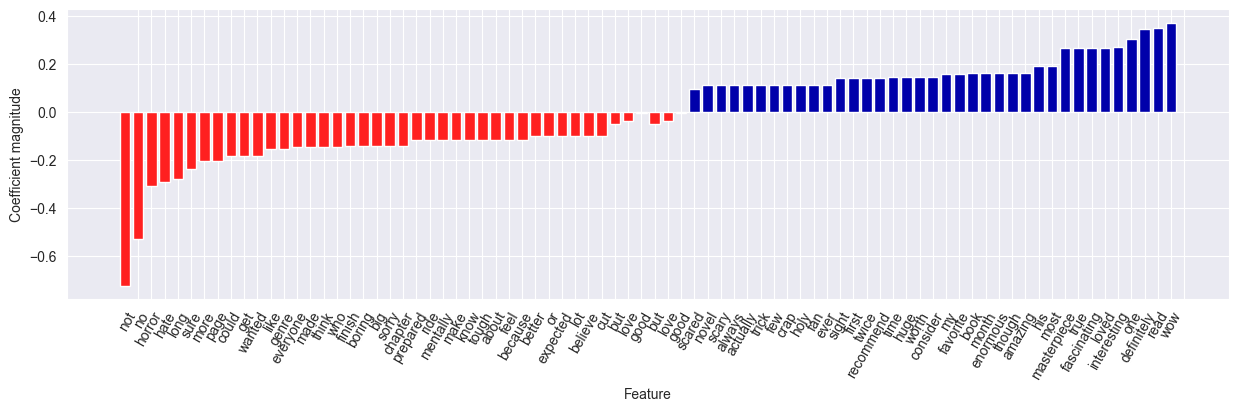

In [325]:
import mglearn

mglearn.tools.visualize_coefficients(lr.coef_, feature_names, n_top_features=40)

In [319]:
from prettytable import PrettyTable
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4, random_state=0)
X_tr_lda = lda.fit_transform(X_tfidf_tr)

feature_names = vect.get_feature_names_out()

table = PrettyTable()
table.field_names = ["Topic", "Top Words"]

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    
    table.add_row([f"Topic #{topic_idx + 1}", ', '.join(top_words)])

print(table)

+----------+------------------------------------------------------------------------------+
|  Topic   |                                  Top Words                                   |
+----------+------------------------------------------------------------------------------+
| Topic #1 |       no, but, not, masterpiece, true, love, book, scared, get, wanted       |
| Topic #2 |  not, horror, wow, interesting, hate, book, favorite, my, amazing, enormous  |
| Topic #3 | loved, fascinating, huge, consider, time, worth, read, definitely, but, book |
| Topic #4 |         his, most, page, more, one, long, scared, book, believe, cut         |
+----------+------------------------------------------------------------------------------+
